# Predicting Heart failure in patients with commorbidities using deep learning model


### 1. Introduction
Heart failure prediction in patients with comorbidities is essential for optimizing clinical care and improving patient outcomes. Comorbid conditions such as diabetes, hypertension, and chronic kidney disease significantly impact the management and prognosis of heart failure. Deep learning models offer a promising approach to analyze the intricate interactions between various risk factors and predict heart failure risk accurately. By leveraging large datasets containing diverse patient information, including medical history, demographic data, and laboratory results, these models can uncover complex patterns and provide valuable insights into individual patient risk profiles.

In this study, we develop and assess the performance of a deep learning model specifically tailored to predict heart failure in patients with comorbidities. Through comprehensive data preprocessing and model training, we aim to enhance the accuracy and reliability of heart failure risk predictions. By integrating deep learning techniques into clinical practice, we strive to empower healthcare professionals with advanced tools for early detection and proactive management of heart failure in patients with complex health conditions.









### 2. Research Design

<a id="design"></a>

1. [Introduction](#intro)

   
2. [Research Design](#design)
    
3. [Data Collection](#collect)
    - 3.1 [Import modules](#mod)
    - 3.2 [Accessing](#access)
    

4. [Data Preprocessing](#prep)
    * 4.1 [Categorical Preprocessing](#catprep)
        * [Label Encoding](#lencode)
         
    * 4.2 [Numerical Preprocessing](#numprep)
        * [Preprocessing](#prep)

5. [Model training](#train)

6. [Evaluation Methodology](#eval)
    - 6.1 [Accuracy Score](#acc)
    - 6.2 [Recall Score](#recall)
    - 6.3 [Precision Score](#precision)
    - 6.4 [F1 Score](#f1)
    - 6.5 [Confusion Matrix](#confmax)
7. [Ethical Considerations](#con)

### Data Collection
*  Import modules
*  Accessing


<div id = 'mod'></div>
Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

<div id = 'access'></div>
Accessing

In [2]:
heart = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart.shape

(918, 12)

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
print(heart.isnull().sum().any())
print(heart.duplicated().any())

False
False


In [6]:
categorical = heart.select_dtypes(exclude = 'int')
numerical = heart.select_dtypes(include = 'int')

In [7]:
categorical.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,Oldpeak,ST_Slope
0,M,ATA,Normal,N,0.0,Up
1,F,NAP,Normal,N,1.0,Flat
2,M,ATA,ST,N,0.0,Up
3,F,ASY,Normal,Y,1.5,Flat
4,M,NAP,Normal,N,0.0,Up


In [8]:
pd.DataFrame(categorical.nunique(), columns = ["Number of unique values"])

,Number of unique values
Sex,2
ChestPainType,4
RestingECG,3
ExerciseAngina,2
Oldpeak,53
ST_Slope,3


In [9]:
categorical.Oldpeak.head()

0    0.0
1    1.0
2    0.0
3    1.5
4    0.0
Name: Oldpeak, dtype: float64

Oldpeak is a numerical feature 

In [10]:
categorical = categorical.drop('Oldpeak', axis = 1)
numerical['Oldpeak'] = heart['Oldpeak']

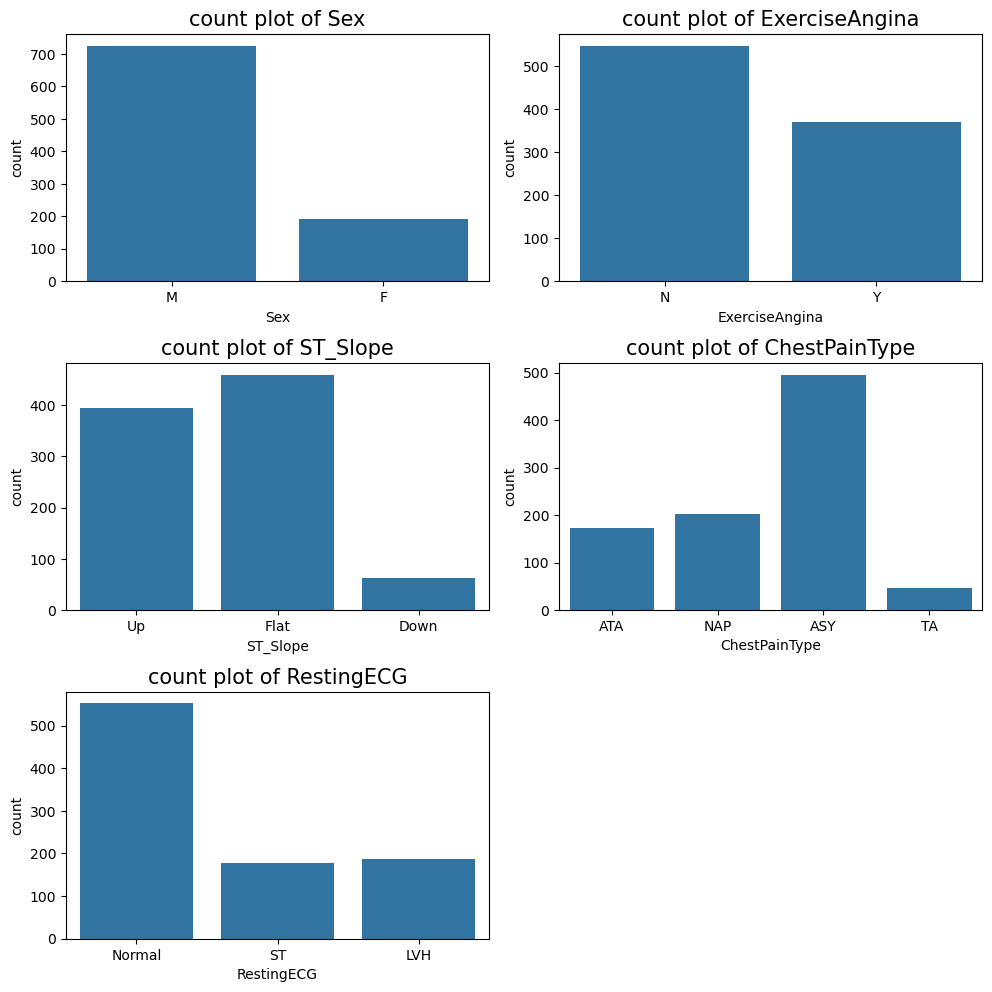

In [11]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 10))
for idx, col in enumerate(categorical.columns):
    axes = ax[(idx) % 3][(idx) % 2]
    sns.countplot(data = categorical, x = col, ax = axes)
    ax[2][1].axis('off')
    axes.set_title(f'count plot of {col}', fontsize = 15)
    fig.tight_layout(pad = 1)
plt.savefig('plots/cat_countplot.png')

### Data Preprocessing
   


#### Numerical Preprocessing
  * Removal of outliers
  * Standard Scaling
  * Label Encoding

In [12]:
numerical.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease,Oldpeak
0,40,140,289,0,172,0,0.0
1,49,160,180,0,156,1,1.0
2,37,130,283,0,98,0,0.0
3,48,138,214,0,108,1,1.5
4,54,150,195,0,122,0,0.0


In [13]:
pd.DataFrame(numerical.nunique(), columns = ["Number of unique values"])

,Number of unique values
Age,50
RestingBP,67
Cholesterol,222
FastingBS,2
MaxHR,119
HeartDisease,2
Oldpeak,53


FastingBS and HeartDisease are categorical with just two unique values

In [14]:
categorical[['FastingBS', 'HeartDisease']] = numerical[['FastingBS', 'HeartDisease']]
numerical.drop(['FastingBS', 'HeartDisease'], axis = 1, inplace = True)

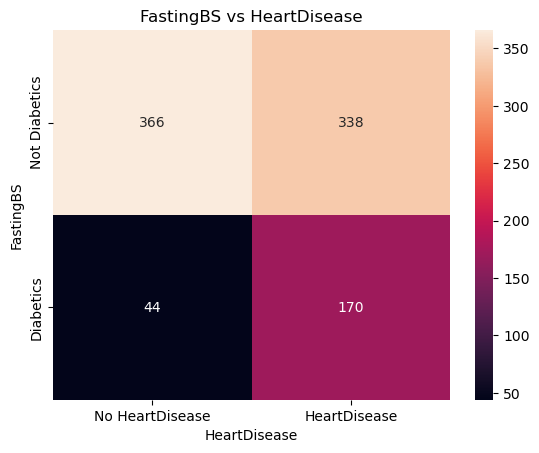

<Figure size 640x480 with 0 Axes>

In [15]:
conf_mat = confusion_matrix(categorical['FastingBS'], categorical['HeartDisease'])
sns.heatmap(conf_mat, annot = True, fmt = '.0f')
plt.title('FastingBS vs HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('FastingBS')

plt.xticks([0.5,1.5], ['No HeartDisease', 'HeartDisease'])
plt.yticks([0.5,1.5], ['Not Diabetics', 'Diabetics'])


plt.show()
plt.savefig("plots/fastingbs_heartdisease.png")

In [16]:
numerical.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


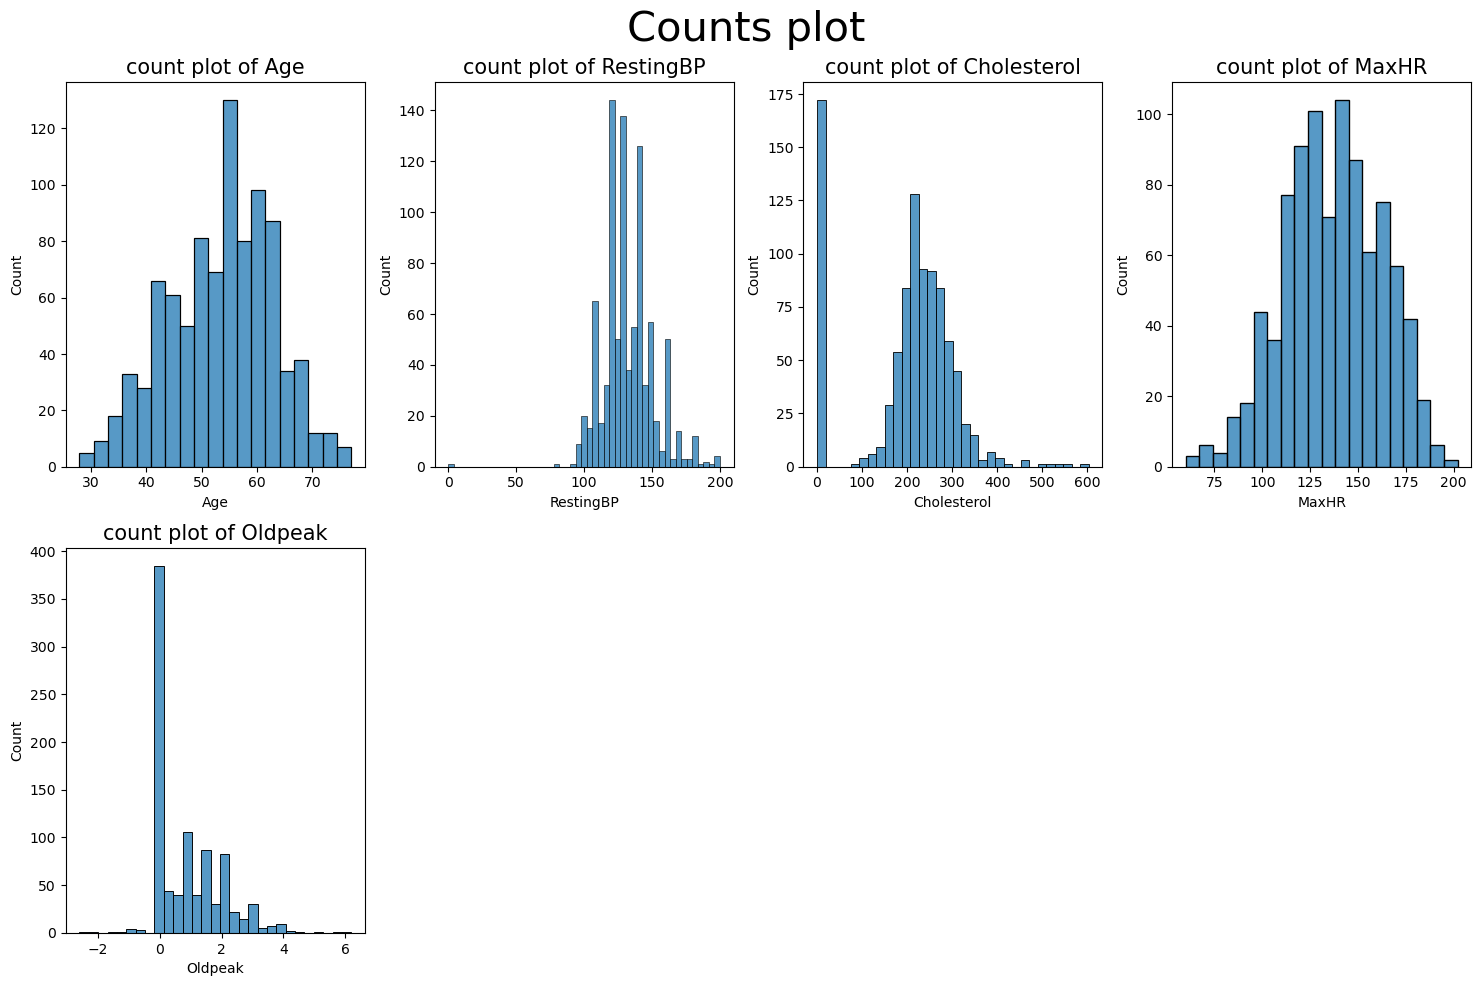

In [17]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (15, 10))
for idx, col in enumerate(numerical.columns):
    axes = ax[idx // 4][idx % 4]
    sns.histplot(data = numerical, x = col, ax = axes)
    axes.set_title(f'count plot of {col}', fontsize = 15)
    fig.tight_layout(pad = 1)
    plt.suptitle('Counts plot', fontsize = 30)
for idx in range(1,4):
    axes = ax[1][idx].axis('off')

plt.savefig('plots/countplot.png')

FastingBS and HeartDisease are categorical

Checking for outliers

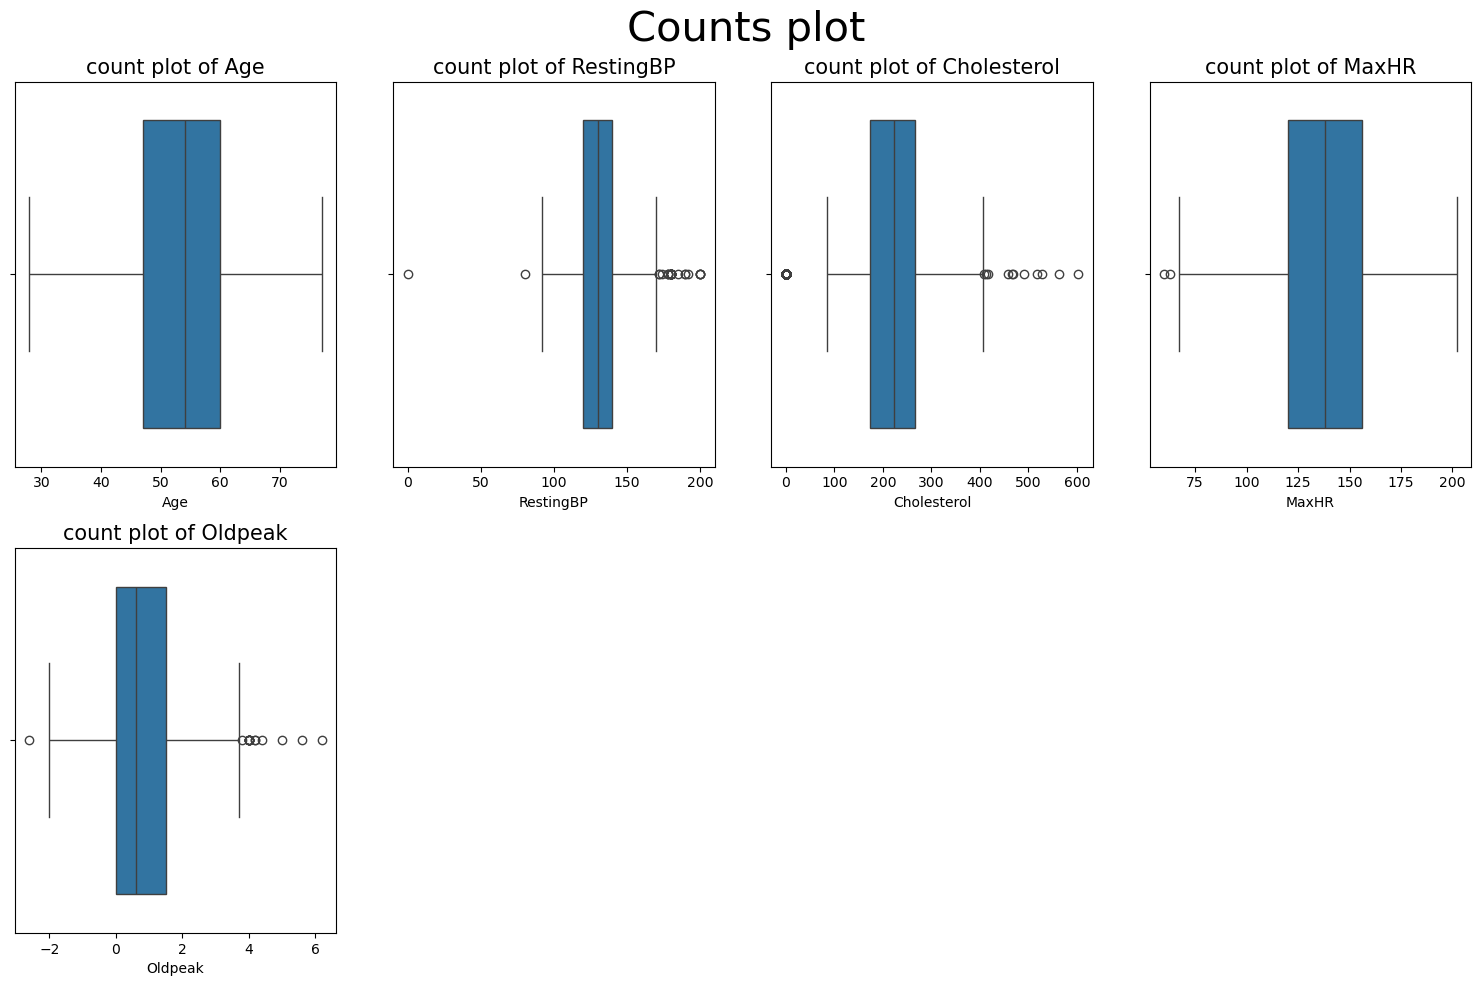

In [18]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (15, 10))
for idx, col in enumerate(numerical.columns):
    axes = ax[idx // 4][idx % 4]
    sns.boxplot(data = numerical, x = col, ax = axes)
    axes.set_title(f'count plot of {col}', fontsize = 15)
    fig.tight_layout(pad = 1)
    plt.suptitle('Counts plot', fontsize = 30)
for idx in range(1,4):
    axes = ax[1][idx].axis('off')

plt.savefig('plots/boxplots.png')

there are some outliers in Cholesterol, MaxHR, Oldpeak and RestingBP

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


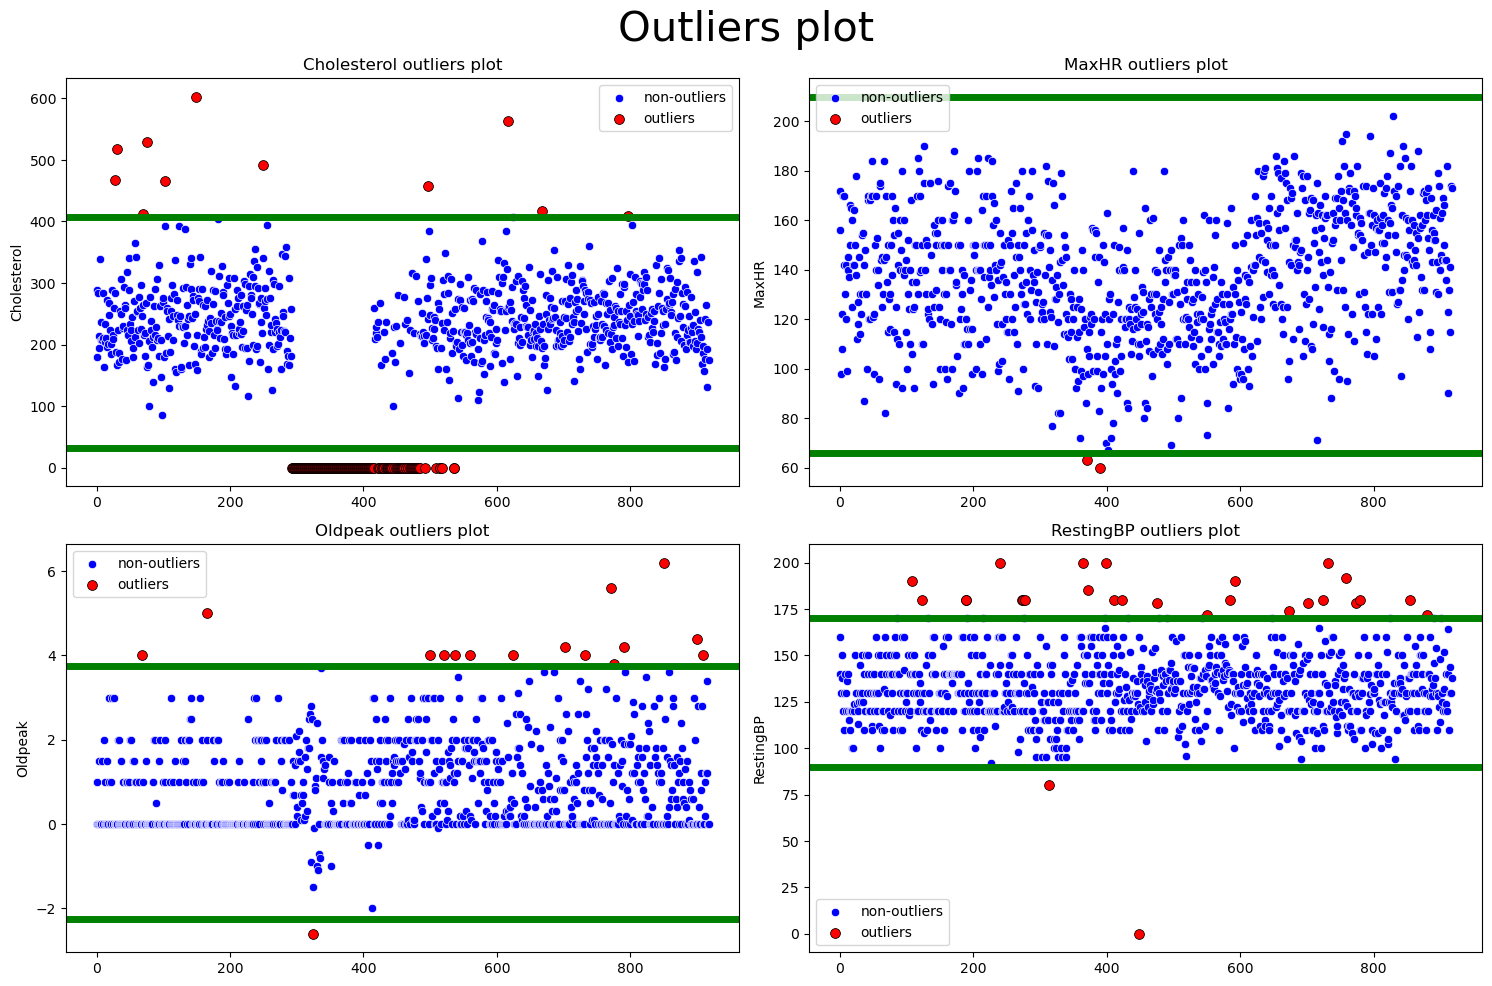

<Figure size 640x480 with 0 Axes>

In [19]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
for idx, col in enumerate(['Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']):
    axes = ax[idx // 2][idx % 2]

    q1 = numerical[col].quantile(0.75)
    q3 = numerical[col].quantile(0.25)
    iqr = q3 - q1
    upperlimit = q1 - 1.5*iqr
    lowerlimit = q3 + 1.5 * iqr
    outliers = numerical[col][(numerical[col] < lowerlimit) | (numerical[col] > upperlimit)]
    
    sns.scatterplot(numerical[col], label = 'non-outliers', color = 'blue', ax = axes)
    sns.scatterplot(outliers, label = 'outliers', color = 'red', edgecolors='black', s=50, ax = axes)
    axes.axhline(upperlimit, color = 'green', linewidth = 5)
    axes.axhline(lowerlimit, color = 'green', linewidth = 5)
    axes.set_title(f'{col} outliers plot')
    fig.tight_layout(pad = 1)
    plt.suptitle('Outliers plot', fontsize = 30)
    plt.legend()



plt.show()
plt.savefig('plots/outliers.png')

removing the outliers

In [20]:
for col in numerical.columns:
    numerical[col] = numerical[col][(numerical[col] > lowerlimit) | (numerical[col] < upperlimit)]

scaling the features

In [21]:
ss = StandardScaler()
numerical = pd.DataFrame(ss.fit_transform(numerical))

#### Categorical Preprocessing
  * Label Encoding

label encoding the features

In [22]:
le = LabelEncoder()
for i in categorical.columns:
    categorical[i] = le.fit_transform(X = categorical[i])

In [23]:
categorical[['FastingBS', 'HeartDisease']] = heart[['FastingBS', 'HeartDisease']]

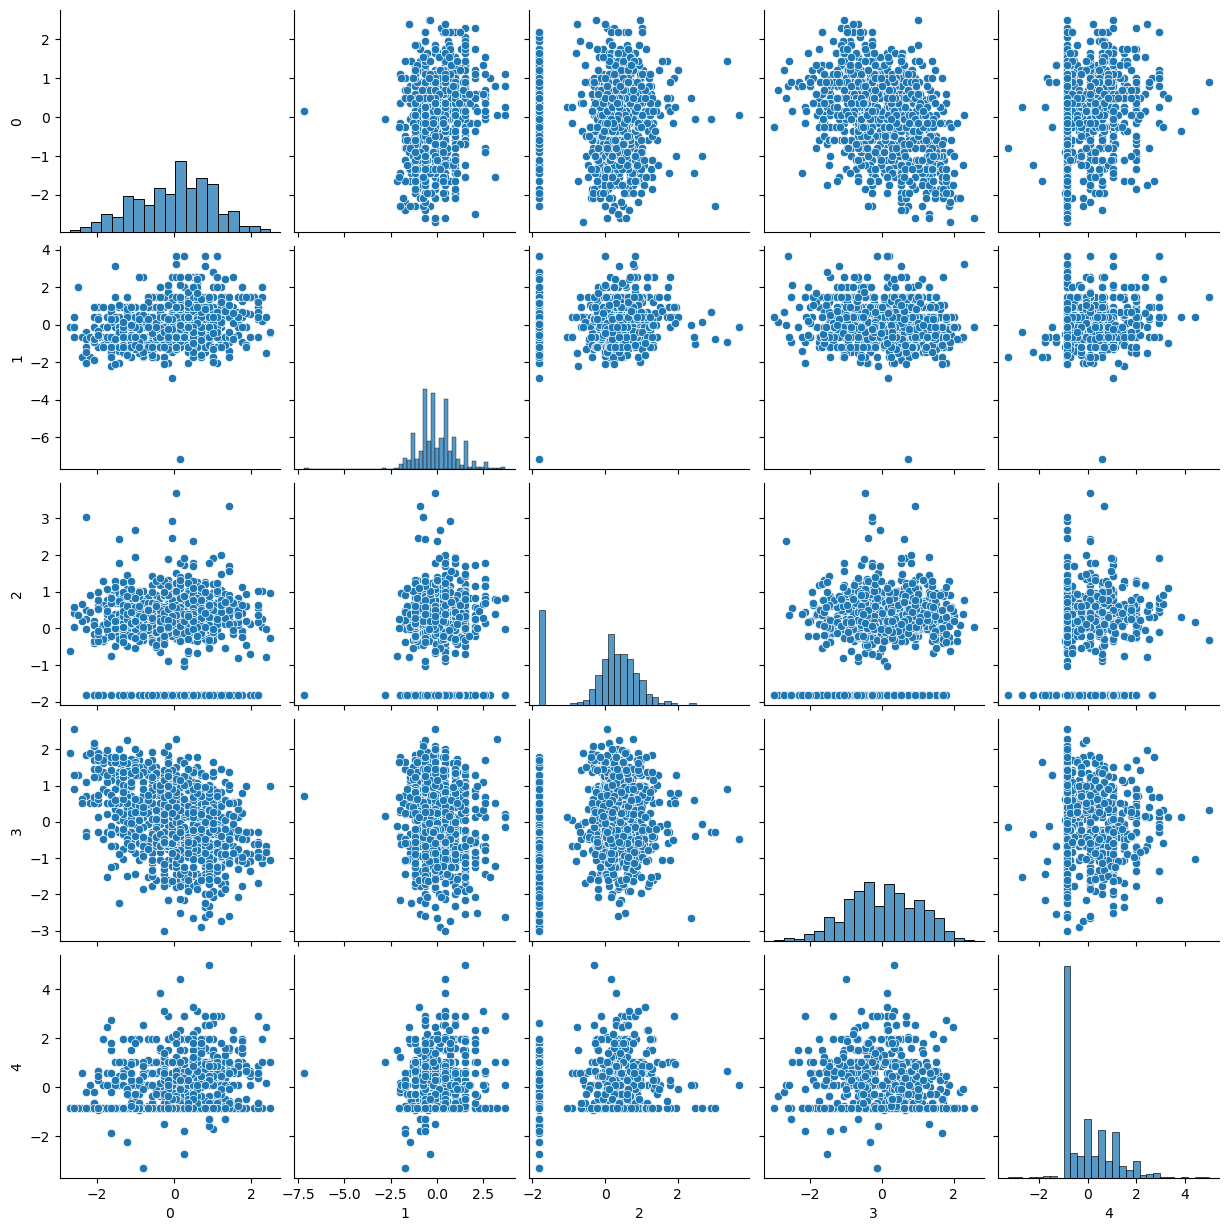

In [24]:
sns.pairplot(numerical)
plt.savefig('plots/numerical_scatter.png')

In [25]:
data = pd.concat([numerical, categorical], axis = 1)

In [26]:
data.head()

,0,1,2,3,4,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS,HeartDisease
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,1,1,1,0,2,0,0
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,0,2,1,0,1,0,1
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,1,1,2,0,2,0,0
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,0,0,1,1,1,0,1
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,1,2,1,0,2,0,0


In [27]:
assert (numerical.shape[0], categorical.shape[1] + numerical.shape[1]) == (data.shape[0], data.shape[1])
print('correctly merged')

correctly merged


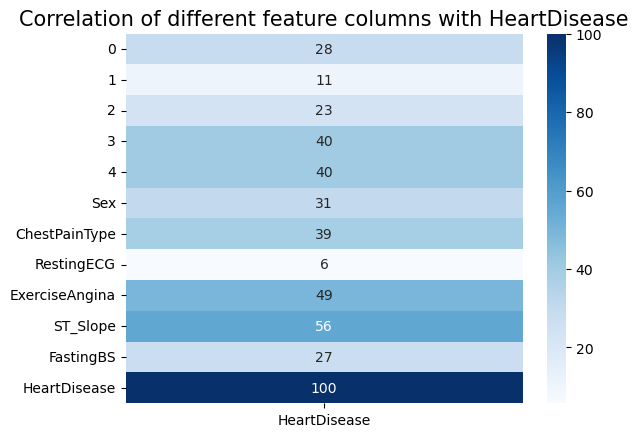

In [28]:
sns.heatmap((data.corr().abs()*100)[['HeartDisease']], annot = True, cmap = 'Blues', fmt = '.0f')
plt.title('Correlation of different feature columns with HeartDisease', fontsize = 15)
plt.savefig('plots/correlation_plot.png')

### Model training

In [29]:
X = data.drop('HeartDisease', axis = 1)
y = data['HeartDisease']

In [30]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test)

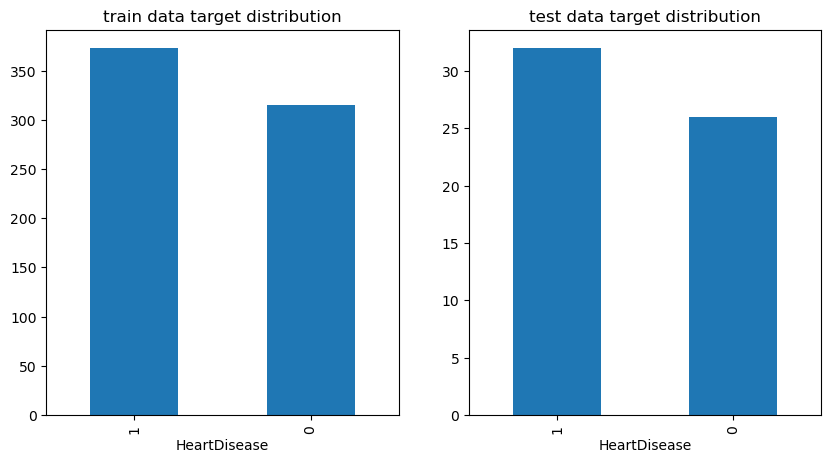

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
pd.Series(y_train).value_counts().plot(kind = 'bar', ax = ax[0])
pd.Series(y_test).value_counts().plot(kind = 'bar', ax = ax[1])
ax[0].set_title('train data target distribution')
ax[1].set_title('test data target distribution')
plt.savefig('plots/train_test_distribution.png')

In [33]:
model = keras.Sequential([keras.layers.Dense(units = 50, activation = 'relu'),
                          keras.layers.Dense(units = 32, activation = 'relu'),
                          keras.layers.Dense(units = 32, activation = 'relu'),
                          keras.layers.Dense(units = 32, activation = 'relu'),
                          keras.layers.Dense(units = 32, activation = 'relu'),
                          keras.layers.Dense(units =1, activation = 'sigmoid')])
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [34]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100, verbose = 1)

Epoch 1/100
22/22 [==============================] - 3s 40ms/step - loss: 0.6440 - accuracy: 0.6613 - val_loss: 0.5545 - val_accuracy: 0.8140
Epoch 2/100
22/22 [==============================] - 0s 10ms/step - loss: 0.4799 - accuracy: 0.8140 - val_loss: 0.4013 - val_accuracy: 0.8372
Epoch 3/100
22/22 [==============================] - 0s 9ms/step - loss: 0.3765 - accuracy: 0.8416 - val_loss: 0.3586 - val_accuracy: 0.8779
Epoch 4/100
22/22 [==============================] - 0s 9ms/step - loss: 0.3443 - accuracy: 0.8576 - val_loss: 0.3576 - val_accuracy: 0.8721
Epoch 5/100
22/22 [==============================] - 0s 10ms/step - loss: 0.3294 - accuracy: 0.8605 - val_loss: 0.3614 - val_accuracy: 0.8721
Epoch 6/100
22/22 [==============================] - 0s 10ms/step - loss: 0.3140 - accuracy: 0.8663 - val_loss: 0.3731 - val_accuracy: 0.8779
Epoch 7/100
22/22 [==============================] - 0s 9ms/step - loss: 0.3044 - accuracy: 0.8663 - val_loss: 0.3570 - val_accuracy: 0.8895
Epoch 8/1

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 32)                1632      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,433
Trainable params: 5,433
Non-trainabl

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

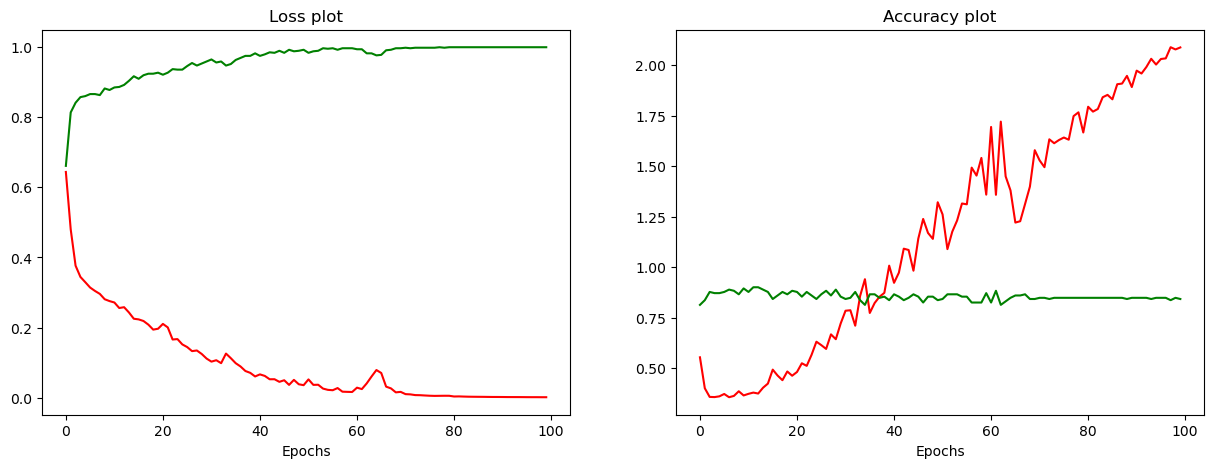

In [37]:
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
sns.lineplot(x = np.arange(0, 100), y = history.history['loss'], ax = ax[0], color = 'r')
sns.lineplot(x = np.arange(0, 100), y = history.history['accuracy'], ax = ax[0], color = 'g')

sns.lineplot(x = np.arange(0, 100), y = history.history['val_loss'], ax = ax[1], color = 'r')
sns.lineplot(x = np.arange(0, 100), y = history.history['val_accuracy'], ax = ax[1], color = 'g')

ax[0].set_title('Loss plot')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_title('Accuracy plot')
plt.savefig('plots/loss_acc_plot.png')

##### Evaluation
* Accuracy Score
* Recall Score
* Precision Score
* F1 Score
* Confusion Matrix

In [38]:
prediction = model.predict(X_test)
prediction = np.round(prediction)

2/2 [==============================] - 0s 8ms/step


In [39]:
print(f'accuracy score: {accuracy_score(prediction, y_test)}')
print(f'recall score: {recall_score(prediction, y_test)}')
print(f'precision score: {precision_score(prediction, y_test)}')
print(f'f1 score: {f1_score(prediction, y_test)}')

accuracy score: 0.8103448275862069
recall score: 0.7837837837837838
precision score: 0.90625
f1 score: 0.8405797101449275


In [40]:
conf_mat = confusion_matrix(prediction, y_test)

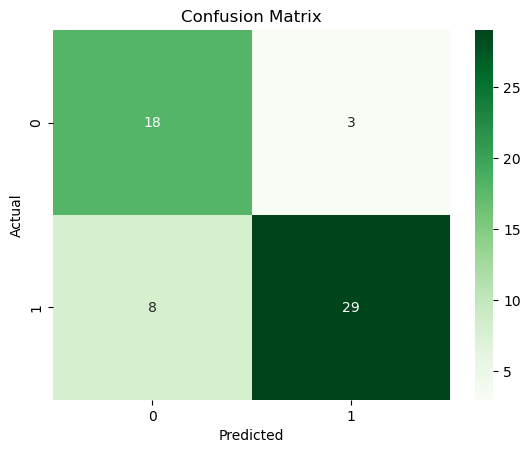

<Figure size 640x480 with 0 Axes>

In [41]:
sns.heatmap(conf_mat, annot = True, fmt = '.0f', cmap = 'Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('plots/conf_matrix.png')